In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import brainio

In [5]:
fed_data = brainio.assemblies.DataAssembly.from_files("no_share/fedorenko.nc")

In [7]:
np.save('FED_SUBJ', fed_data.subject_UID)

<xarray.DataAssembly 'subject_UID' (neuroid: 97)>
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5])
Coordinates:
  * neuroid      (neuroid) MultiIndex
  - electrode    (neuroid) int64 0 1 2 3 4 5 6 7 8 ... 89 90 91 92 93 94 95 96
  - neuroid_id   (neuroid) int64 0 1 2 3 4 5 6 7 8 ... 89 90 91 92 93 94 95 96
  - subject_UID  (neuroid) int64 1 1 1 1 1 1 1 1 1 1 1 ... 5 5 5 5 5 5 5 5 5 5 5

In [2]:
figurePath = '/home3/ebrahim/what-is-brainscore/figures/'

In [3]:
res_full = dict(np.load('/data/LLMs/Fed/stats_results/embedding+pos_encoder.h.1_layer1_1__.npz'))

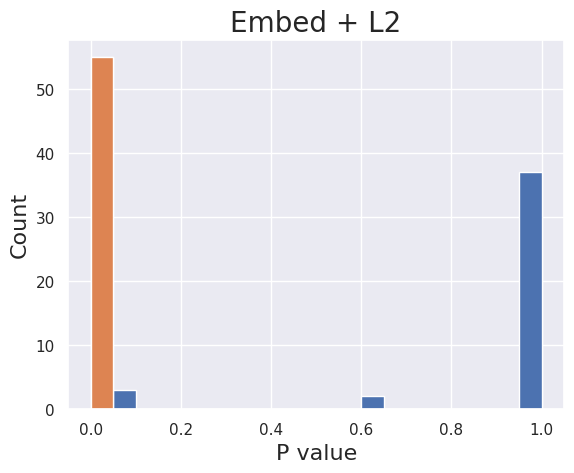

In [4]:
sns.set_theme()
plt.hist(res_full['p_vals'], bins=np.arange(0,1.01, 0.05))
plt.hist(res_full['p_vals'], bins=np.arange(0,0.051, 0.05))
plt.xlabel("P value", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Embed + L2", fontsize=20)
plt.savefig(f"{figurePath}/fed/p_vals_hist_embed_l2", dpi=300, bbox_inches='tight')
plt.show()

In [5]:
sig_indices = np.argwhere(res_full['p_vals'] < 0.05)

In [6]:
res_comp = dict(np.load('/data/LLMs/Fed/stats_results/gpt2-large-untrained-hfgpt-sentencewise_encoder.h.1_1_gpt2-large-untrained-hfgpt-sentencewise_embedding+pos_1.npz'))

In [7]:
sig_p_comp = res_comp['p_vals'][sig_indices]

In [8]:
np.min(sig_p_comp)

0.12505900632821945

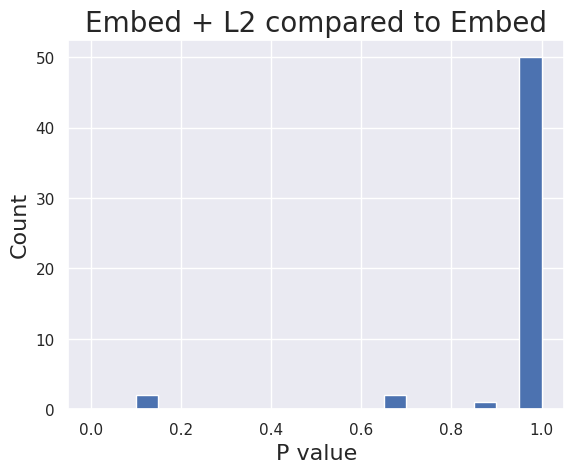

In [9]:
sns.set_theme()
plt.hist(res_comp['p_vals'][sig_indices], bins=np.arange(0,1.01,0.05))
plt.ylabel("Count", fontsize=16)
plt.xlabel("P value", fontsize=16)
plt.title("Embed + L2 compared to Embed", fontsize=20)
plt.savefig(f"{figurePath}/fed/p_val_embed_l2_compared_embed", dpi=300, bbox_inches='tight')

In [20]:
sig_indices.shape

(51, 1)